In [11]:
import sys
from time import time

sys.path.append('../electrode')

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

import oned_grid as d1

In [14]:
ma = d1.Mathieu()
a, q = 1e-8, 0.5
t1 = time()
nu1 = ma.nu_exp_det(a,q,20)
t2 = time()
nu2 = ma.nu_exp_d0ap(a,q)
t3 = time()
nu3 = ma.nu_exp_bla(a,q)
t4 = time()
nu4 = ma.nu_exp_ivp(a,q,method='RK45')
t5 = time()
print(t2-t1,t3-t2,t4-t3,t5-t4)
print(1.,(t3-t2)/(t2-t1),(t4-t3)/(t2-t1),(t5-t4)/(t2-t1))
print(nu1,nu2,nu3,nu4)
np.sqrt(0.5**2/2)

0.00021529197692871094 5.3882598876953125e-05 3.62396240234375e-05 0.0012736320495605469
1.0 0.2502768549280177 0.16832779623477298 5.915836101882613
0.3737444131460965 0.37374336262257873 0.3535534047354091 0.3738176380742827


0.3535533905932738

In [3]:
nu_n, nu = ma.nu_tolerance(a,q)
ma.init_sol(a,q)
ma.sol_y1(0,2)
ma.sum_c(nu_n,5,a,q,nu)

-6.106226635438361e-16
0.0


(0.1258788388503541,
 0.6255020908468046,
 1.9999994965510102,
 0.2517576777007076,
 1.5987156791853407,
 0.9999999999999998)

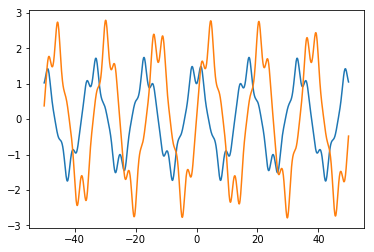

In [4]:
tend, h = 50, 0.1
tp = np.arange(-tend,tend,h)
fig, ax = plt.subplots()
# ax.set_aspect("equal")
ax.plot(tp,ma.sol_y1(tp),tp,ma.sol_y2(tp))
# ax.plot(tp,ma.sol_y1(tp),tp,ma.sol_y2(tp),tp,np.cos(nu*tp),tp,1/np.sqrt(a)*np.sin(nu*tp))

In [9]:
a, q = 1.4, 0.5
ma.nu_exp_det(a,q,20),ma.nu_exp_ivp(a,q,method='Radau')

Complex characteristic exponent nu: unbounded motion.
Complex characteristic exponent nu: unbounded motion.


((0.11221592737462782+1j), (0.11220356120417373+1j))

1.4677668425160557 0.4696543549338391


(0.9858407434387271, 0.9818931188189923)

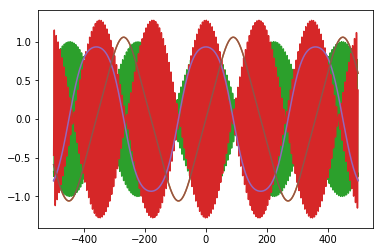

In [6]:
m,q = 1,0.5
tend, h = 500, 0.1
diff = 0.001
tp = np.arange(-tend,tend,h)
ap, bp = sp.mathieu_a(m,q)+diff, sp.mathieu_b(m,q)-diff
print(ap,bp)
maa, mab = d1.Mathieu(), d1.Mathieu()
nua = maa.nu_exp_ivp(ap,q,method='Radau')#nu_tolerance(ap,q)
nub = mab.nu_exp_ivp(bp,q,method='Radau')#nu_tolerance(bp,q)
maa.init_sol(ap,q,nc=20,mode='det')
mab.init_sol(bp,q,nc=20,mode='det')
fig, ax = plt.subplots()
ax.plot(tp,sp.mathieu_cem(m,q,tp)[0],tp,sp.mathieu_sem(m,q,tp)[0],tp,maa.sol_y1(tp),tp,mab.sol_y2(tp))
ax.plot(tp,sp.mathieu_cem(m,q,tp)[0],tp,sp.mathieu_sem(m,q,tp)[0])
nua, nub

In [10]:
np.complex == complex

True